# 📊 Hierarchical Clustering & DBSCAN | UNDERFIT | OVERFIT

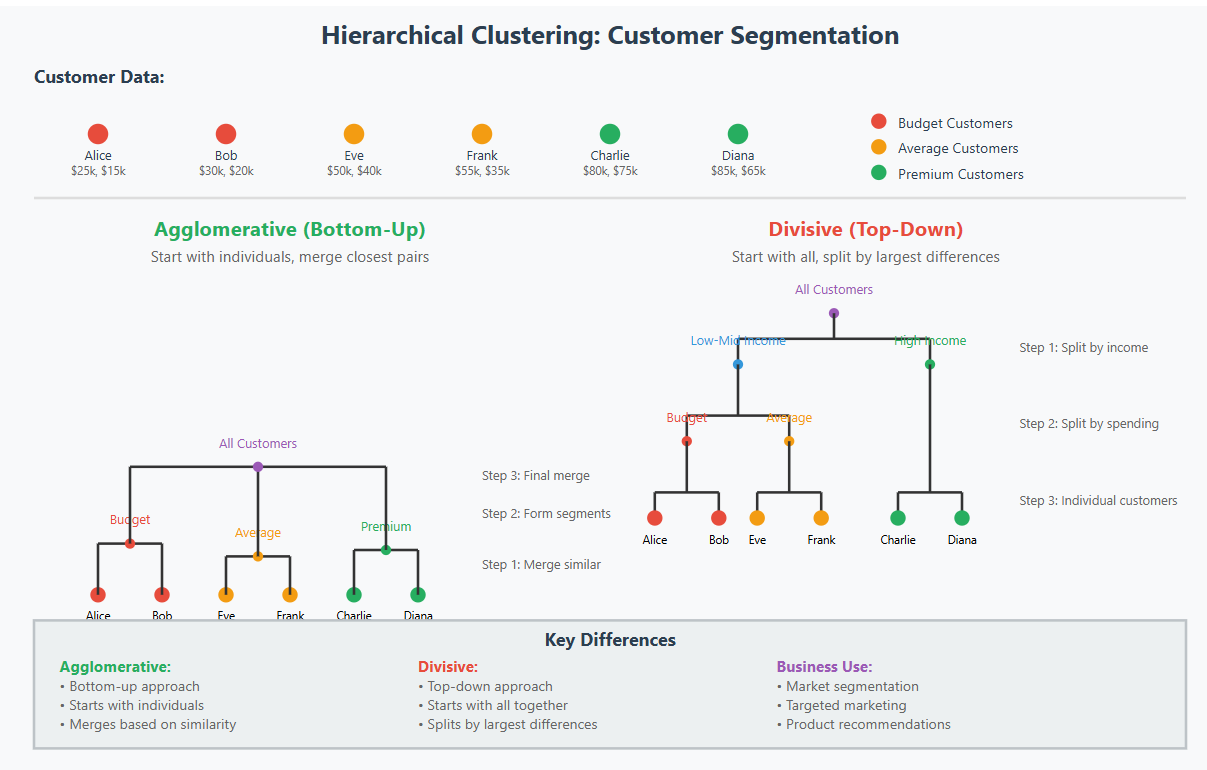![image.png]()

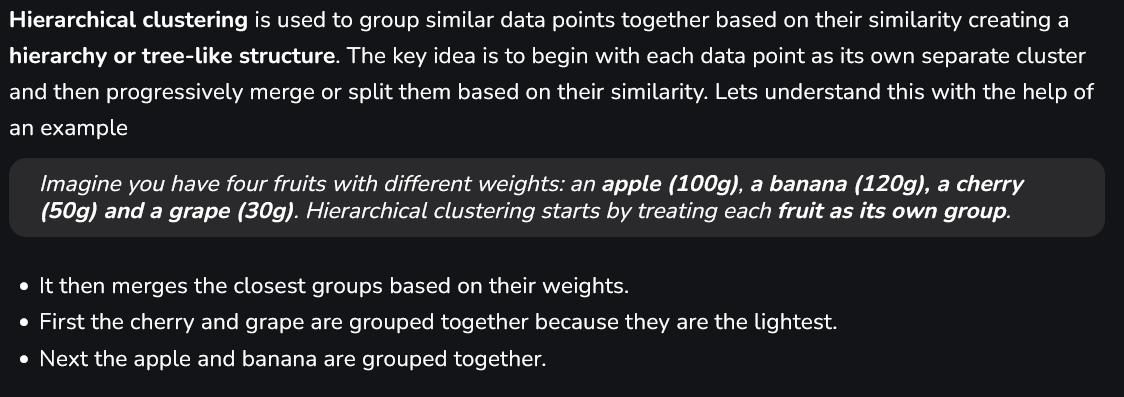

### 📚 Theory: Hierarchical Clustering
## Hierarchical Clustering builds a tree (dendrogram) of clusters without needing to specify the number of clusters.
## Two main types:
## - **Agglomerative** (bottom-up): Start with each point as its own cluster, merge closest pairs
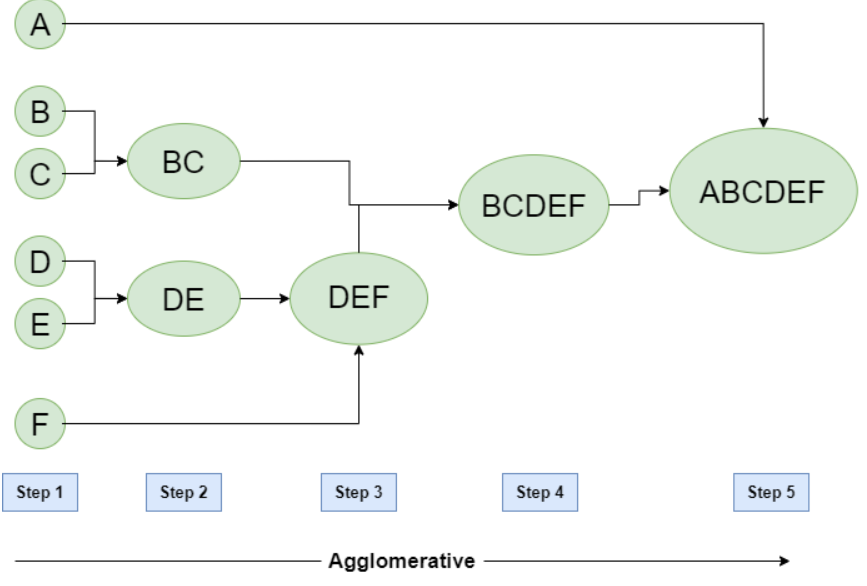
## - **Divisive** (top-down): Start with one big cluster, then split it recursively
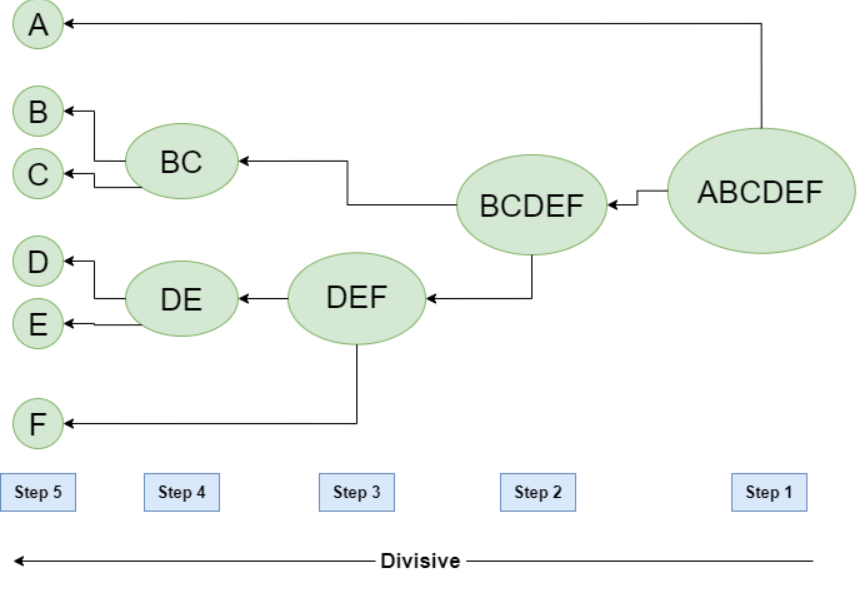
## **Dendrograms** visualize this hierarchy and help you decide the number of clusters.

In [ ]:
# 1. 📥 Import libraries and generate synthetic data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
# Generate blob data (good for hierarchical)
X_blob, y_blob = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)


    make_blobs: This function from scikit-learn's datasets module is used to create isotropic Gaussian blobs for clustering.
    n_samples=300: This specifies that the dataset should contain 300 data points.
    centers=4: This indicates that there should be 4 distinct centers for the blobs, effectively creating 4 clusters.
    cluster_std=1.0: This sets the standard deviation of the clusters. A value of 1.0 means the points within each cluster are relatively spread out.
    random_state=42: This ensures that the data generation is reproducible. If you run the code again with the same random_state, you will get the exact same dataset.
    X_blob, y_blob: The function returns two arrays: X_blob contains the features (the x and y coordinates of the points), and y_blob contains the true cluster labels (0, 1, 2, or 3) for each point.


In [ ]:
# Generate moon data (good for DBSCAN)
X_moon, y_moon = make_moons(n_samples=300, noise=0.1, random_state=42)

make_moons: This is a function from scikit-learn's datasets module used to create this specific type of non-linearly separable data.
n_samples=300: This specifies that the dataset should contain 300 data points.
noise=0.1: This adds a small amount of random noise to the data points, making the clusters slightly less perfectly separated and more realistic.

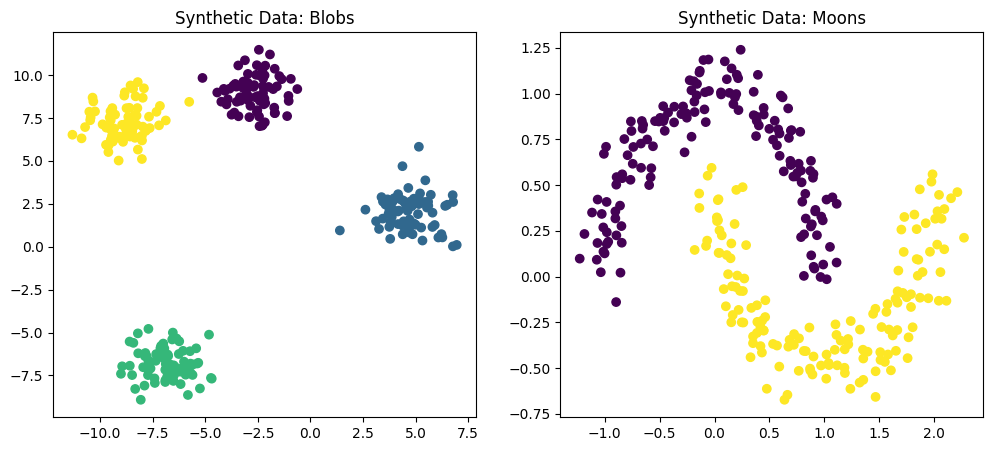

In [ ]:
# Plot both datasets
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap='viridis')
axs[0].set_title("Synthetic Data: Blobs")
axs[1].scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap='viridis')
axs[1].set_title("Synthetic Data: Moons")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


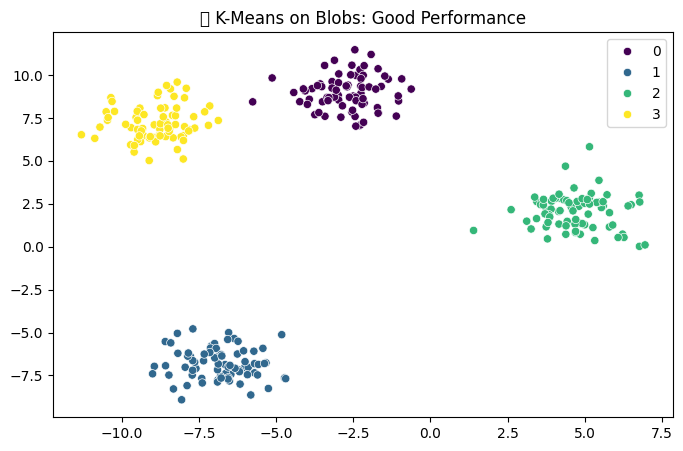

In [ ]:
# 🔎 KMeans on Blobs
Xb_scaled = StandardScaler().fit_transform(X_blob)
kmeans_blob = KMeans(n_clusters=4, random_state=42) # We know there are 4 clusters in the blob data
kmeans_blob_labels = kmeans_blob.fit_predict(Xb_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_blob[:, 0], y=X_blob[:, 1], hue=kmeans_blob_labels, palette='viridis')
plt.title('✅ K-Means on Blobs: Good Performance')
plt.show()

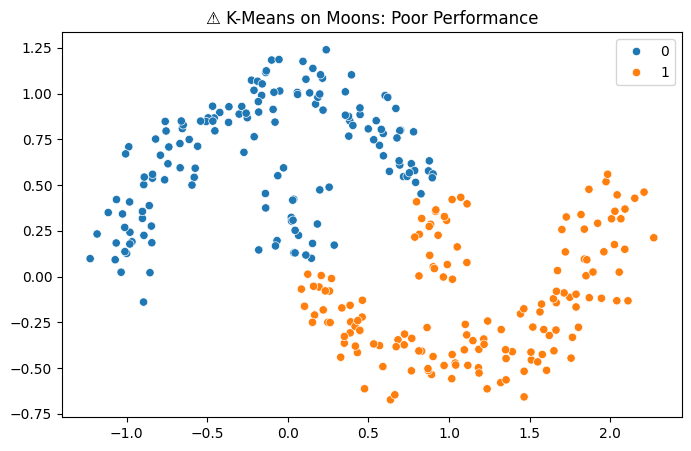

In [ ]:
# 🔍 KMeans struggles on Moons
Xm_scaled = StandardScaler().fit_transform(X_moon)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(Xm_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_moon[:, 0], y=X_moon[:, 1], hue=kmeans_labels, palette='tab10')
plt.title('⚠️ K-Means on Moons: Poor Performance')
plt.show()


In [ ]:
# 2. 📈 Hierarchical Clustering on Blobs
Xb_scaled = StandardScaler().fit_transform(X_blob)
linked = linkage(Xb_scaled,method='ward')

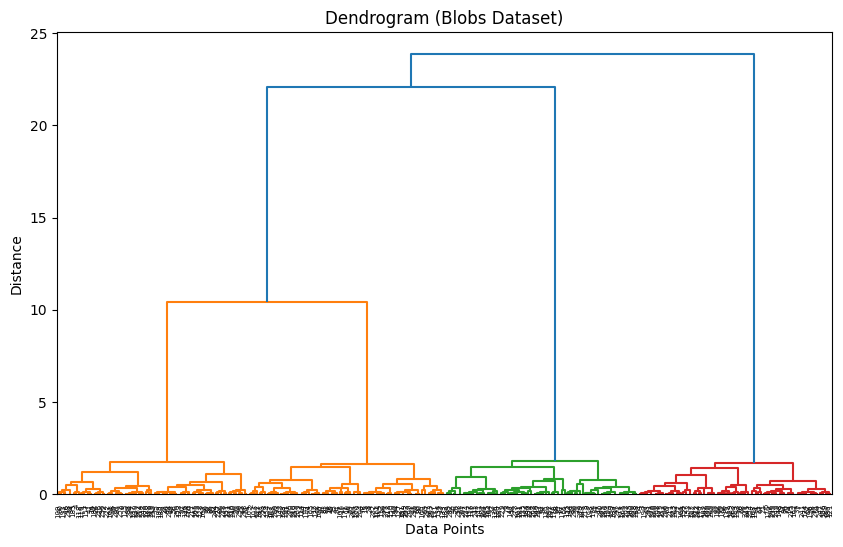

In [ ]:
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram (Blobs Dataset)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Assign clusters
hc_labels = fcluster(linked, t=4, criterion='maxclust')

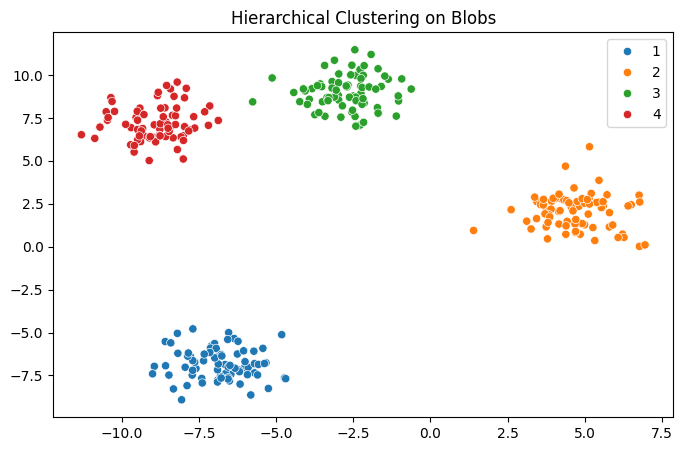

In [ ]:

# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_blob[:, 0], y=X_blob[:, 1], hue=hc_labels, palette='tab10')
plt.title('Hierarchical Clustering on Blobs')
plt.show()

### 📚 Theory: DBSCAN (Density-Based Spatial Clustering)

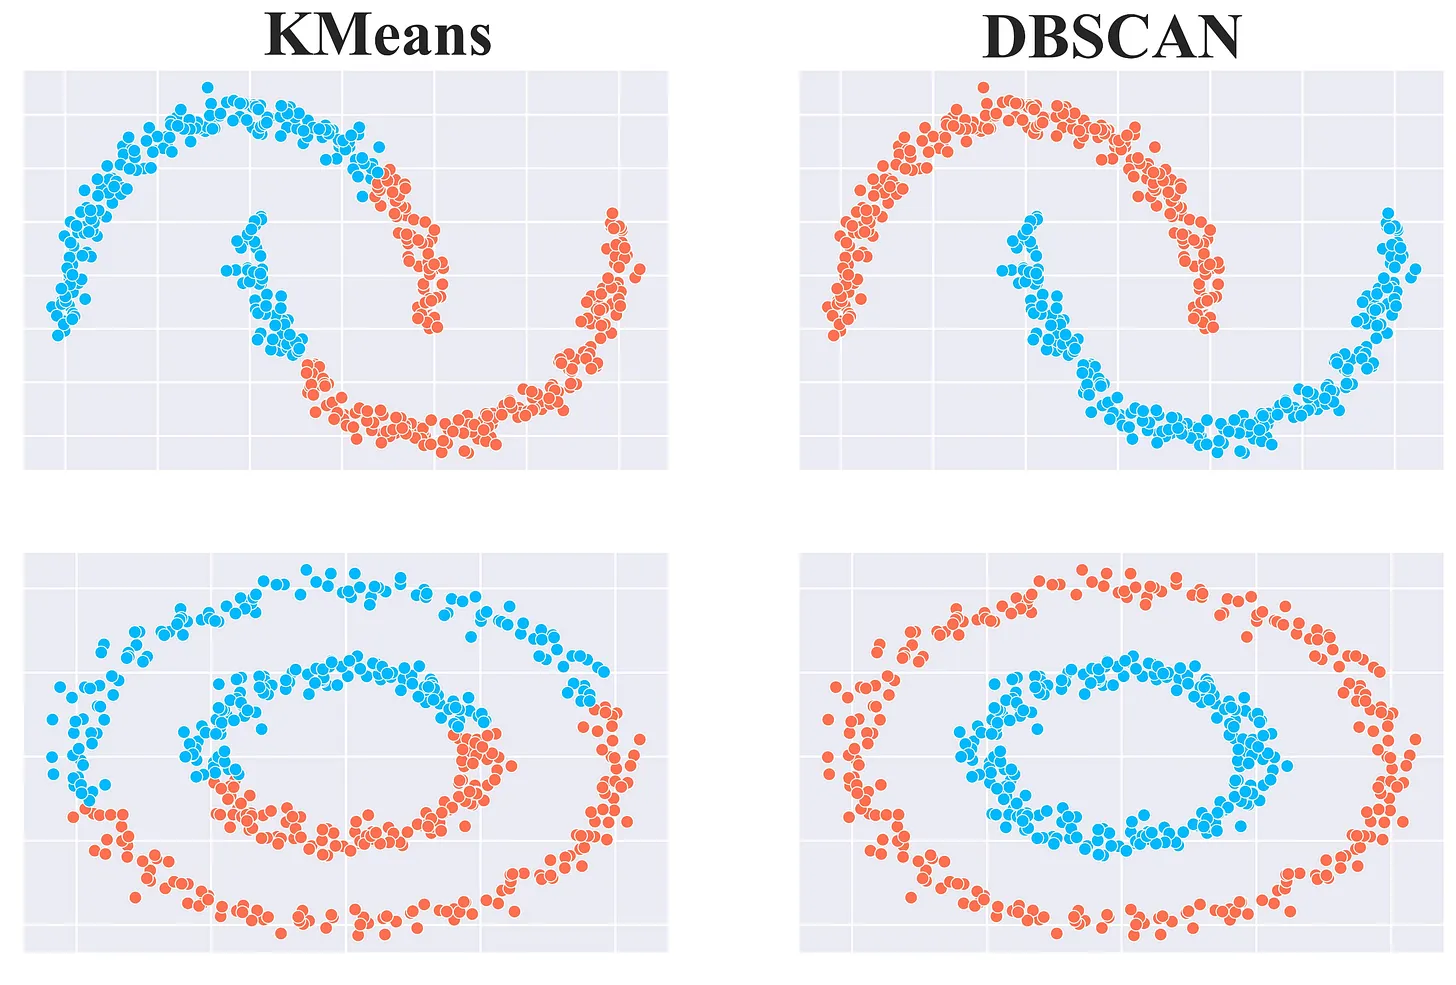
## DBSCAN clusters data based on the density of points:
## - High-density regions form clusters
## - Low-density regions become noise or outliers
## Parameters:
## - `eps`: distance threshold for neighbors
## - `min_samples`: minimum number of neighbors to form a dense region
# Pros:
## - No need to choose number of clusters
## - Can find arbitrarily shaped clusters
## - Identifies noise points

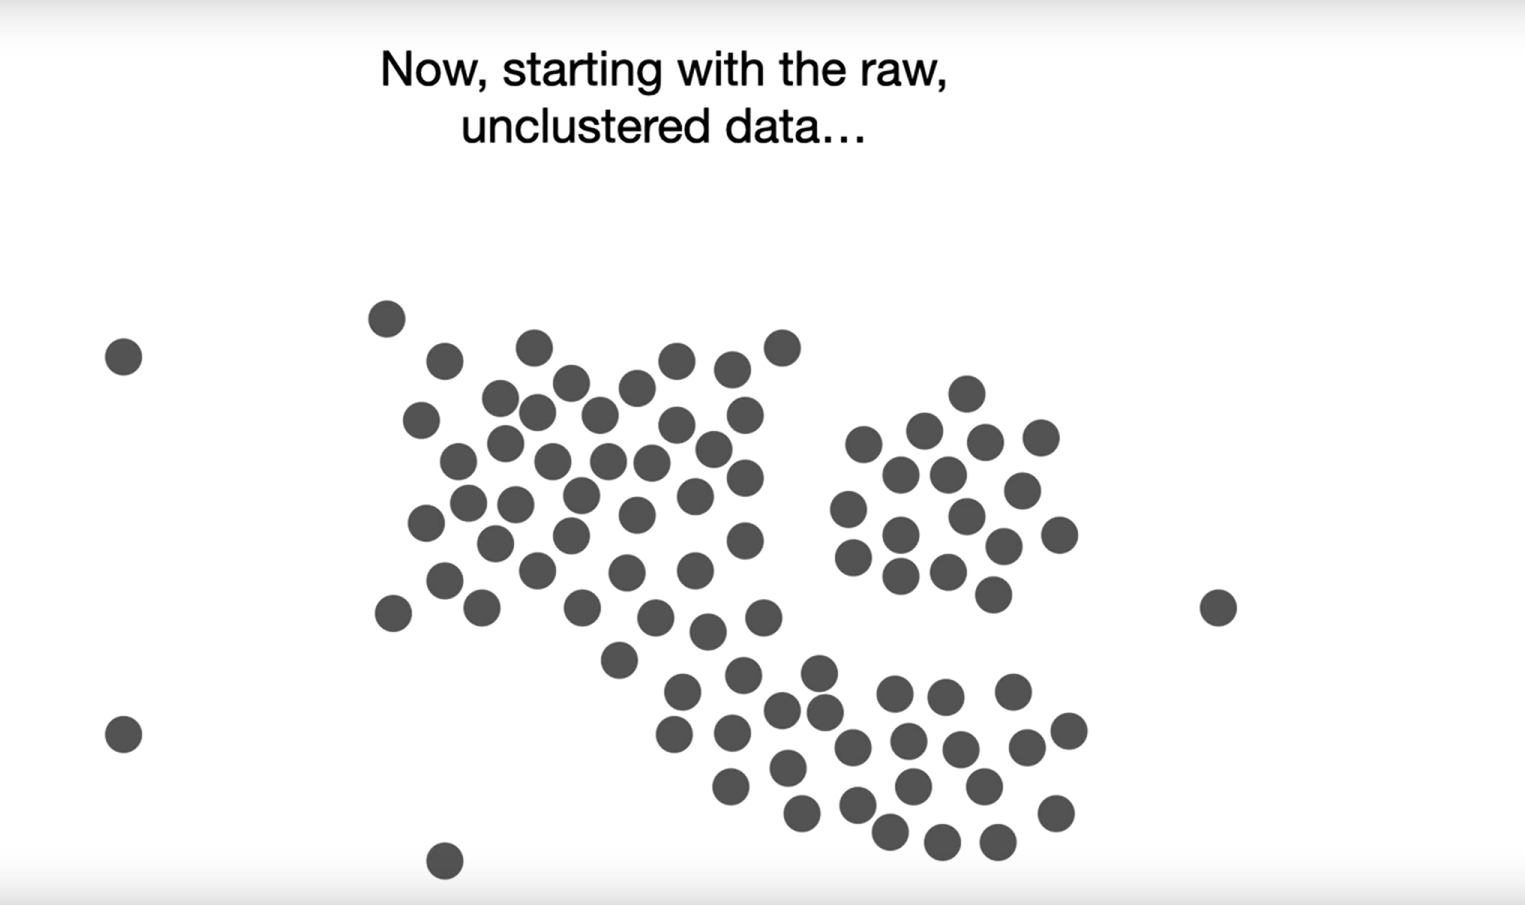

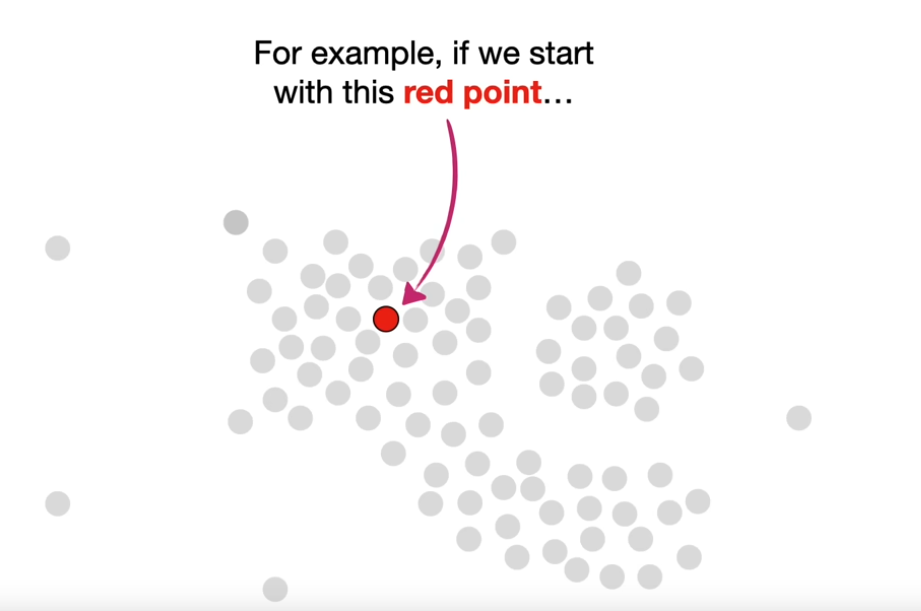

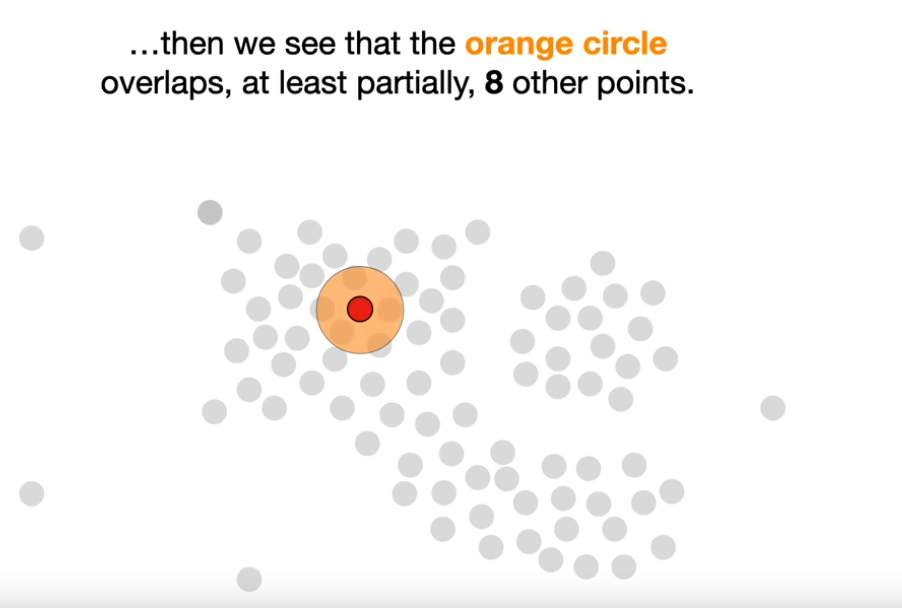

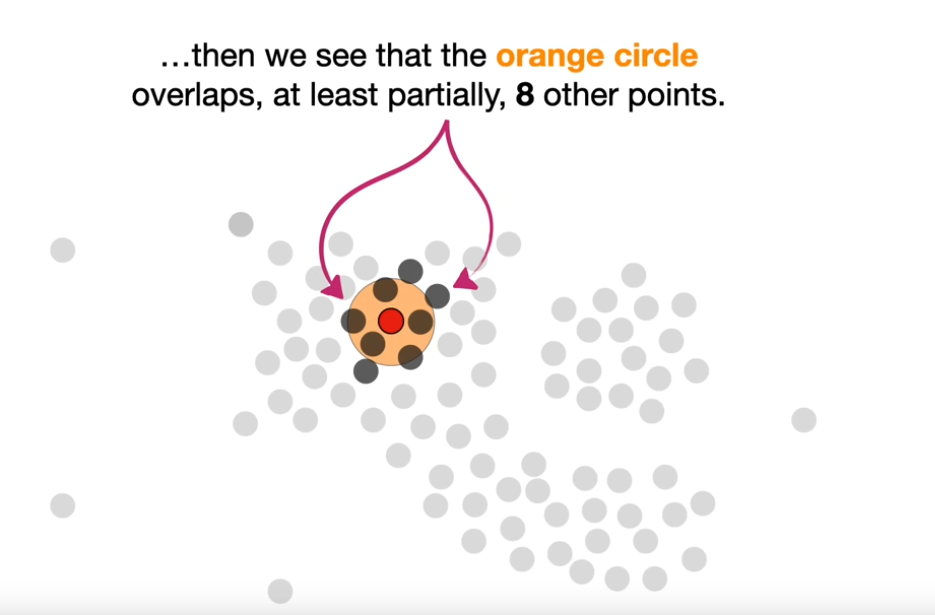

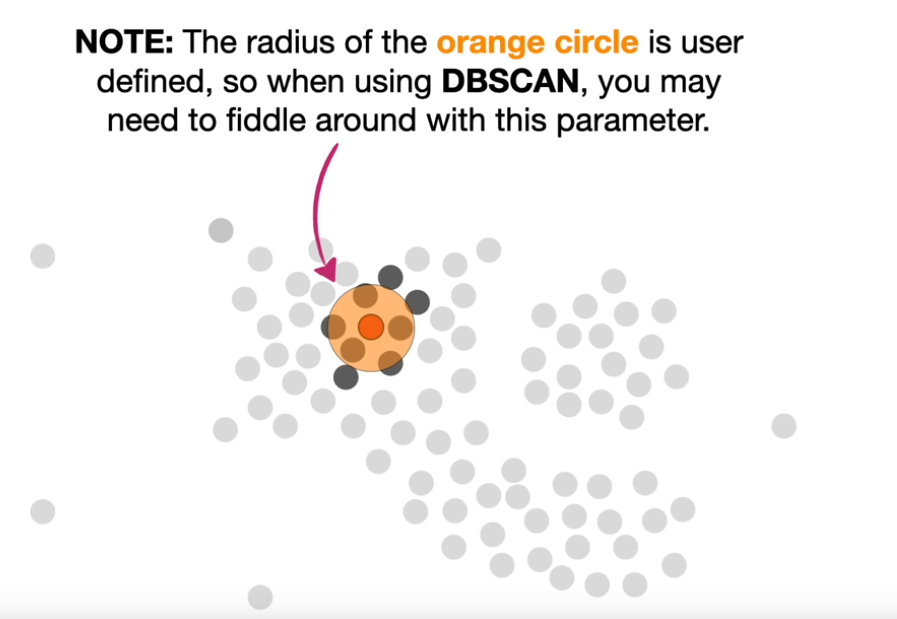

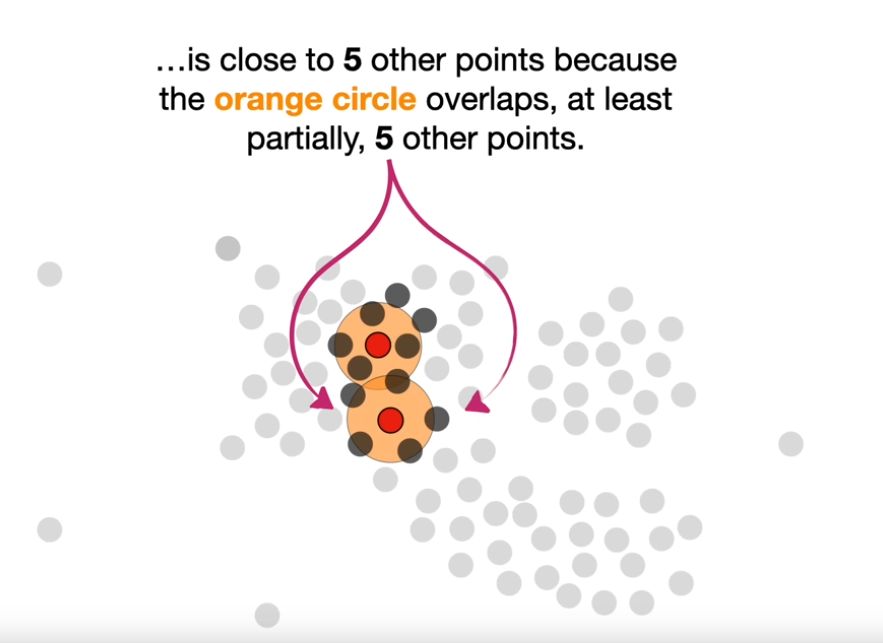

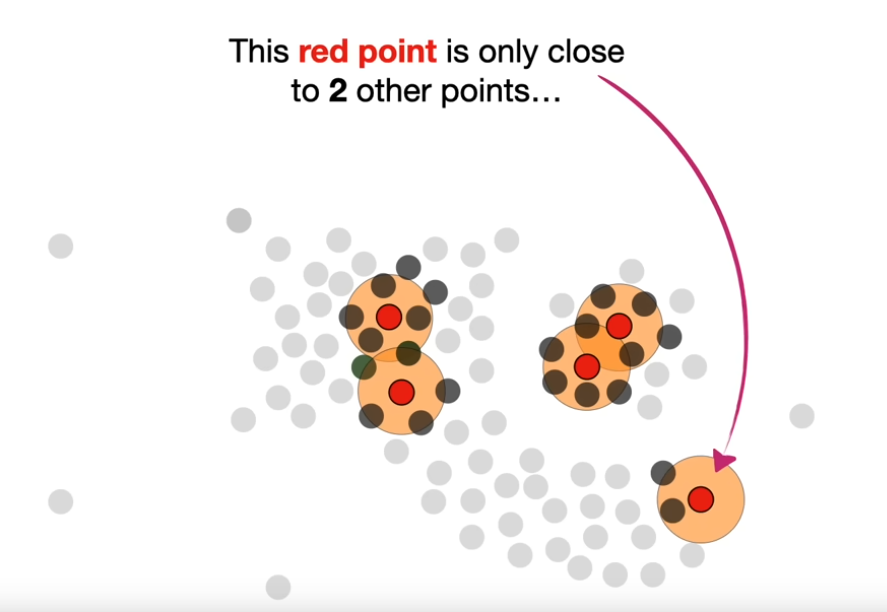

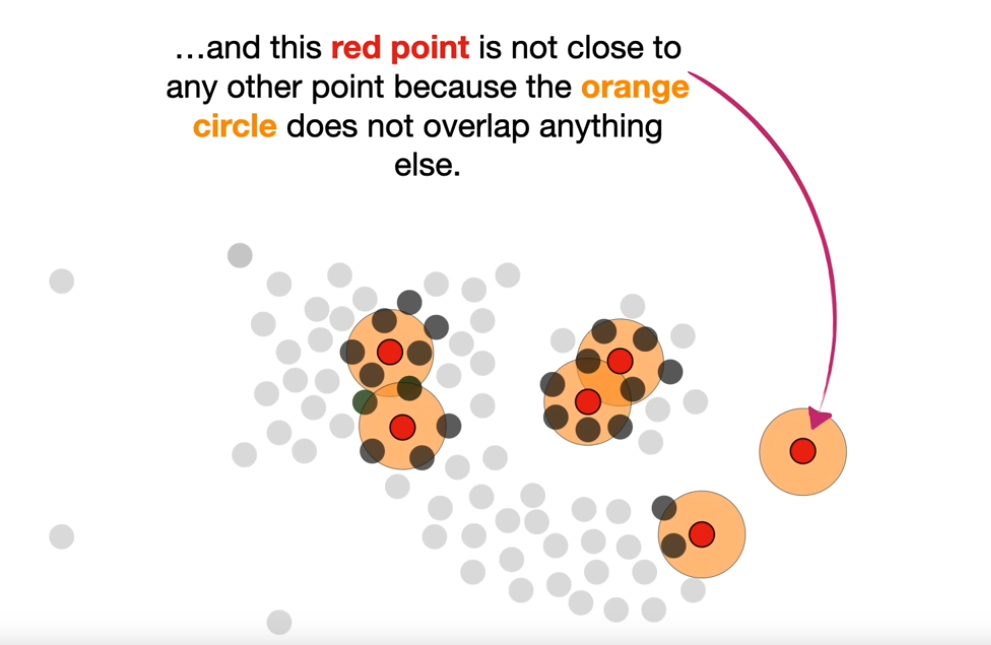

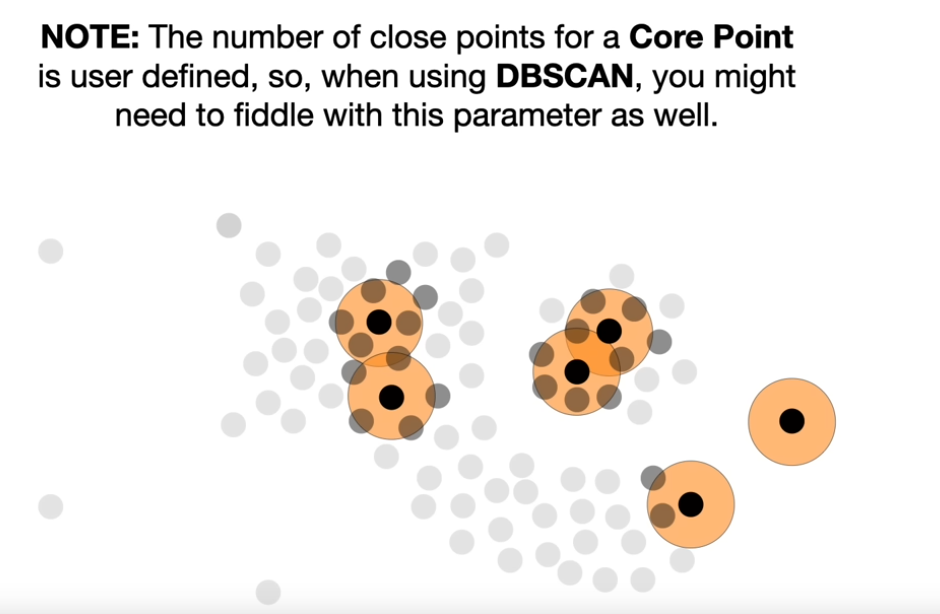


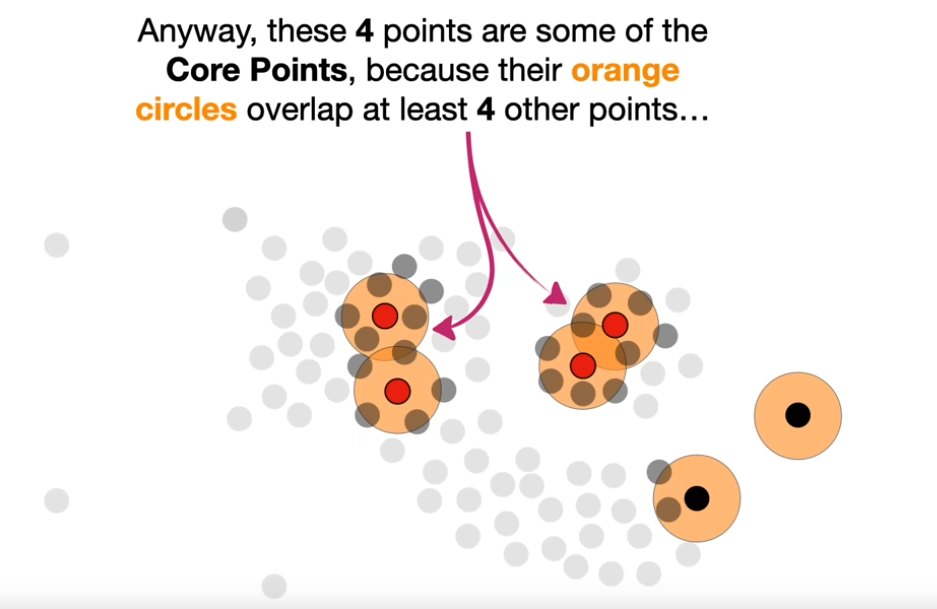

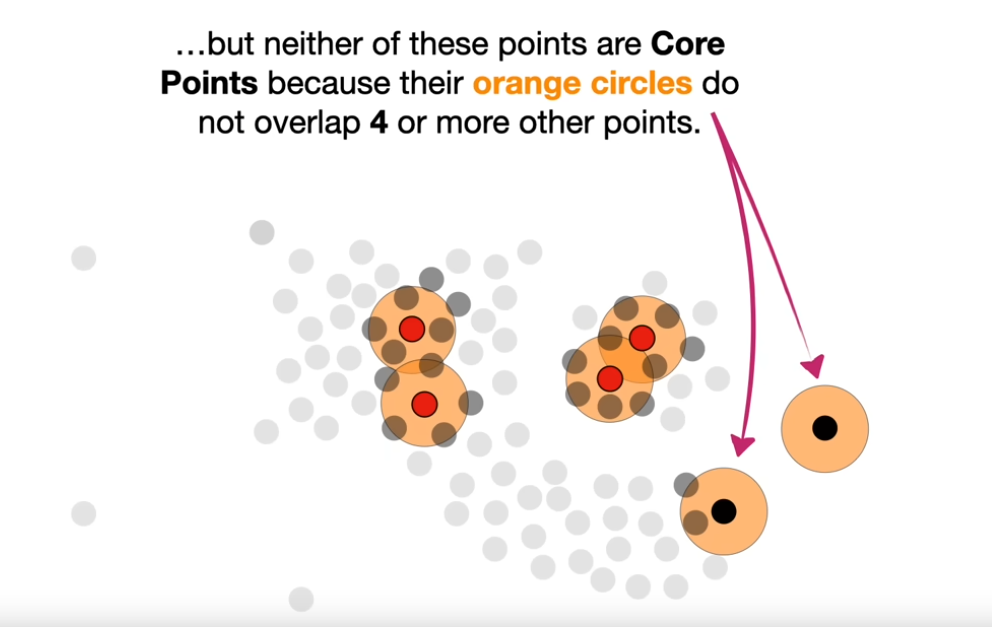

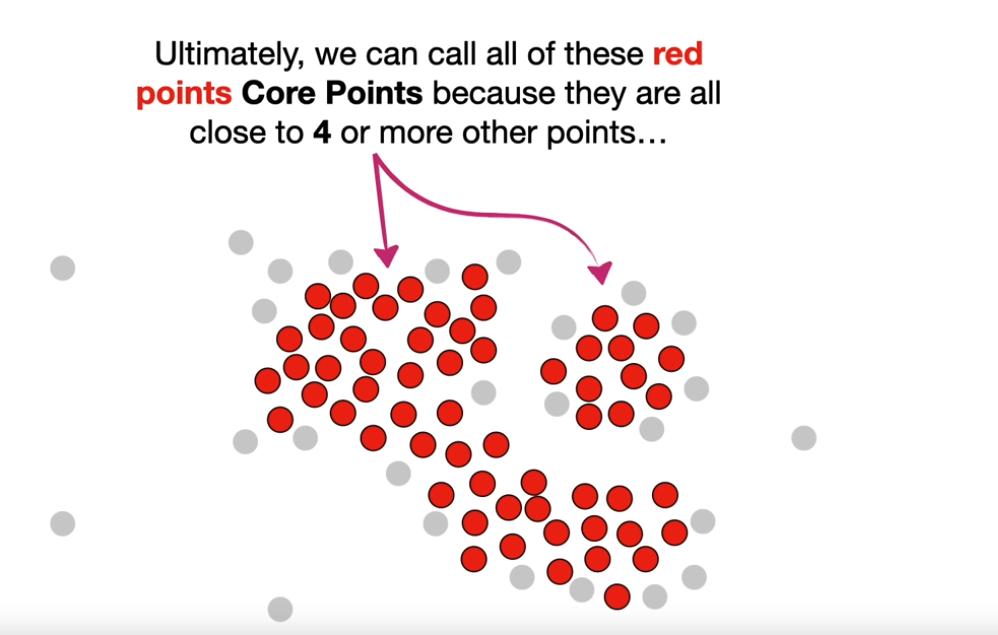


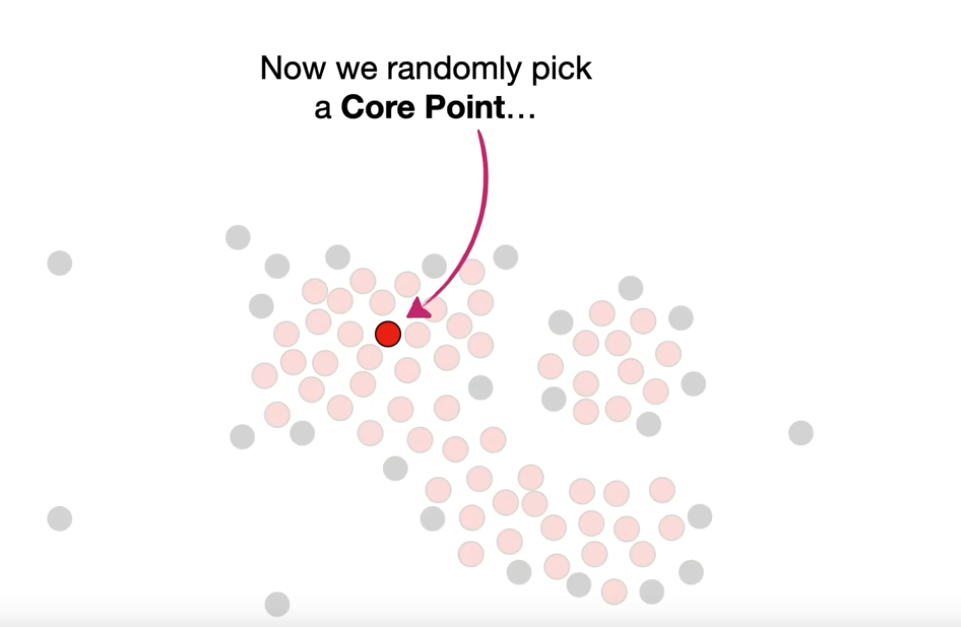

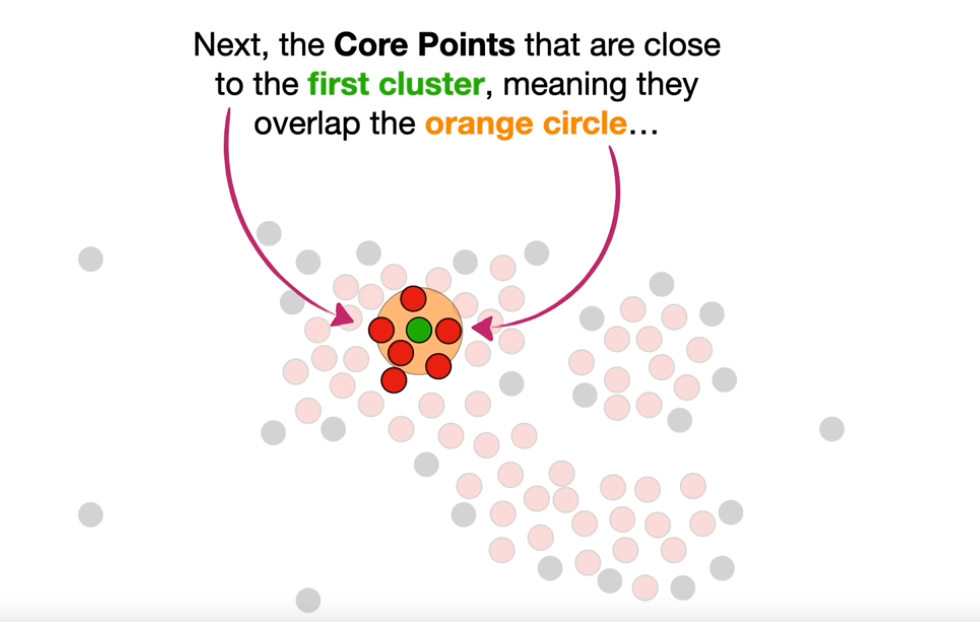

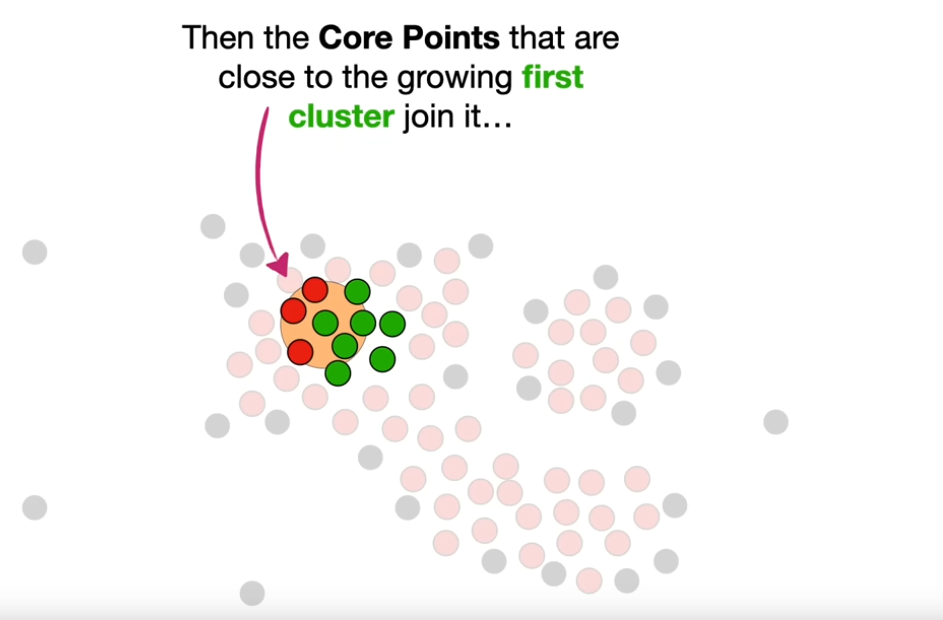

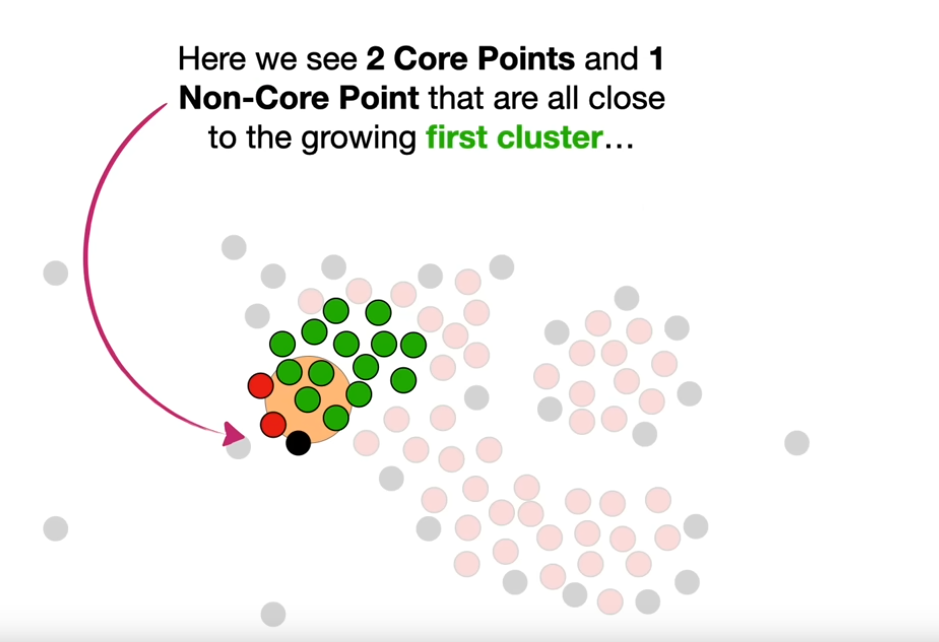

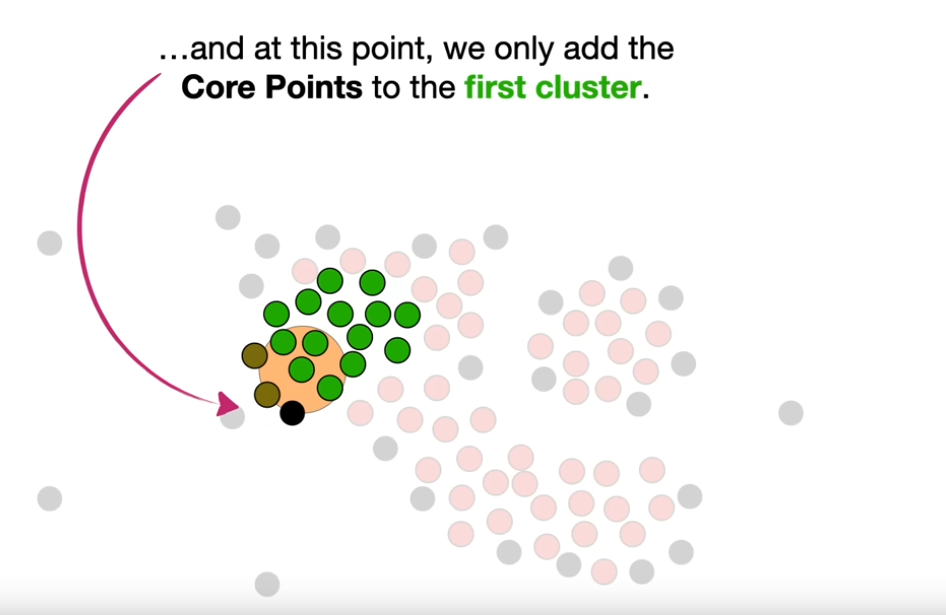

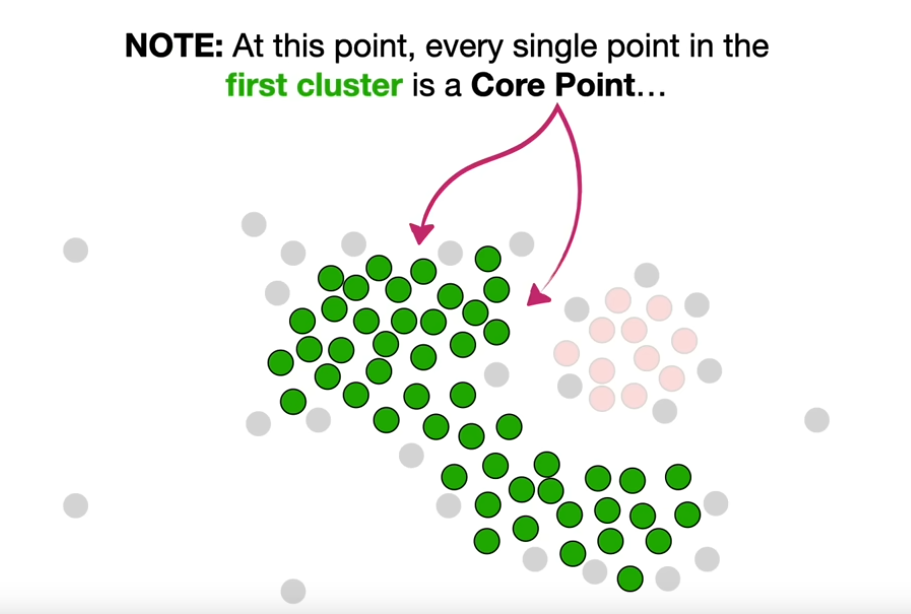

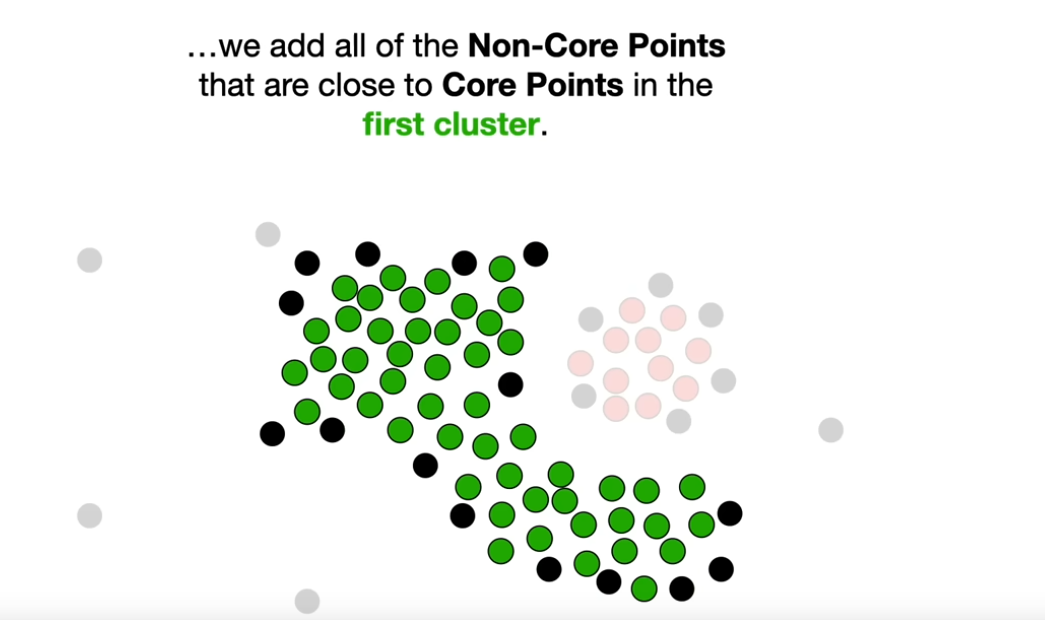

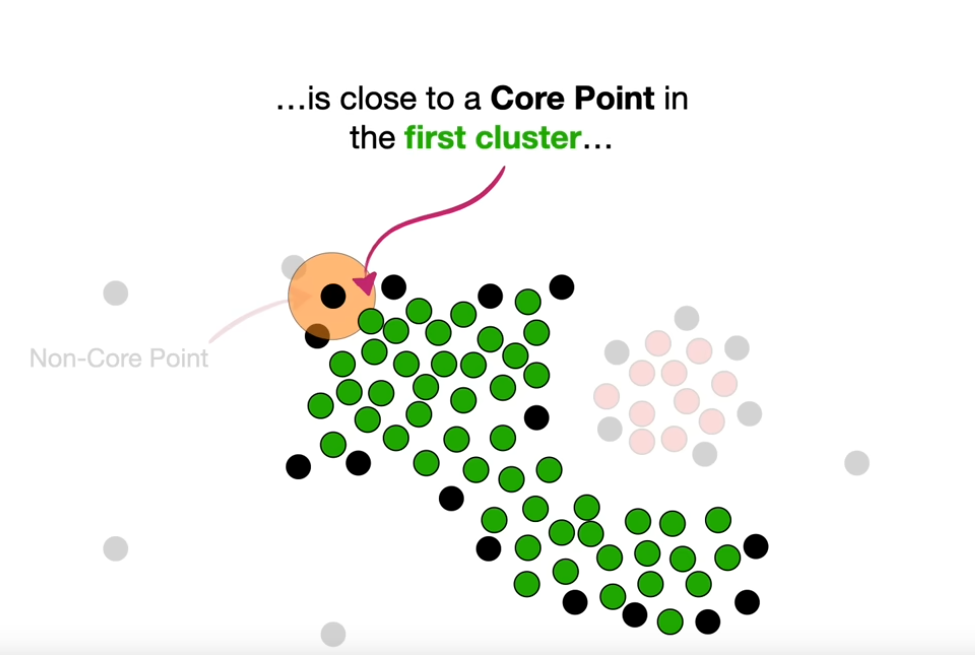

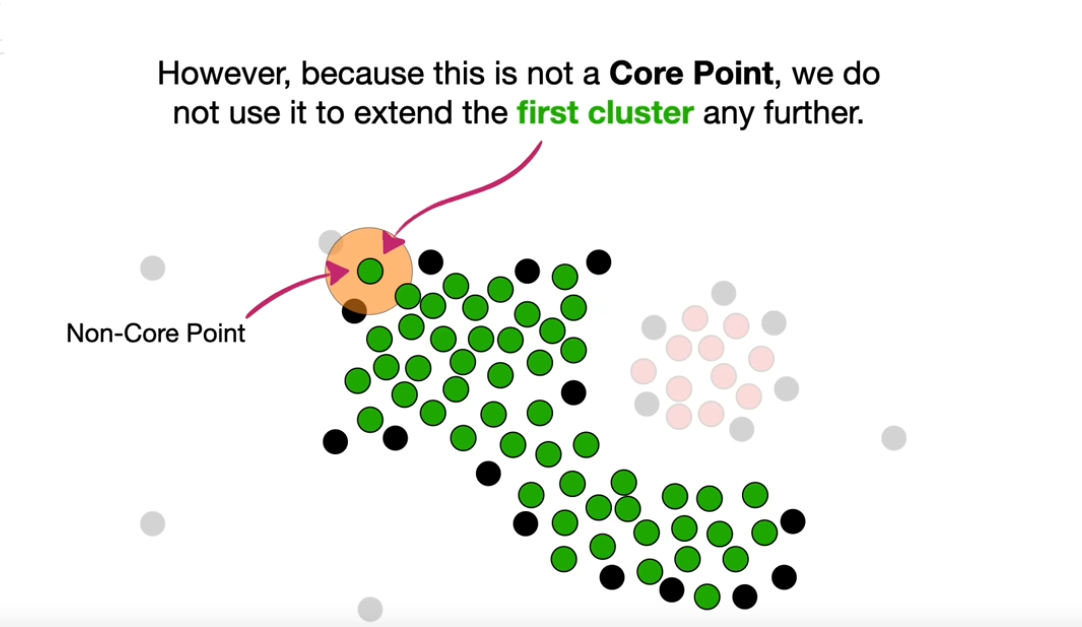

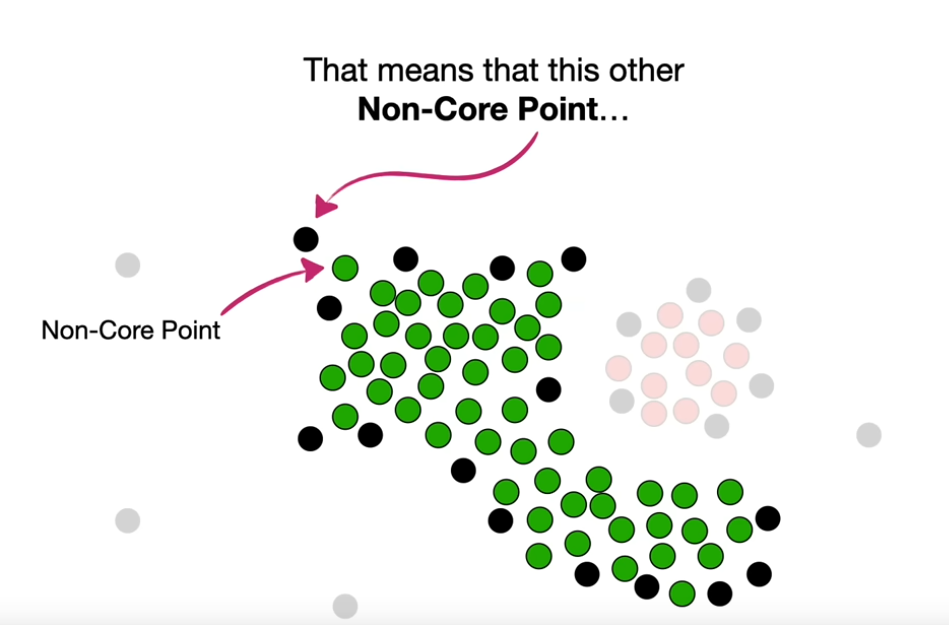

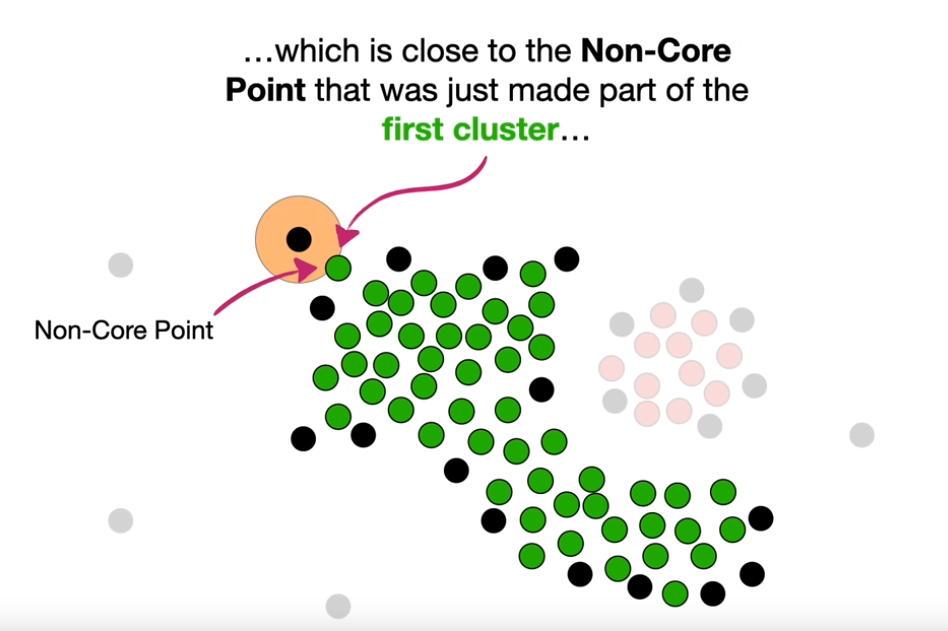


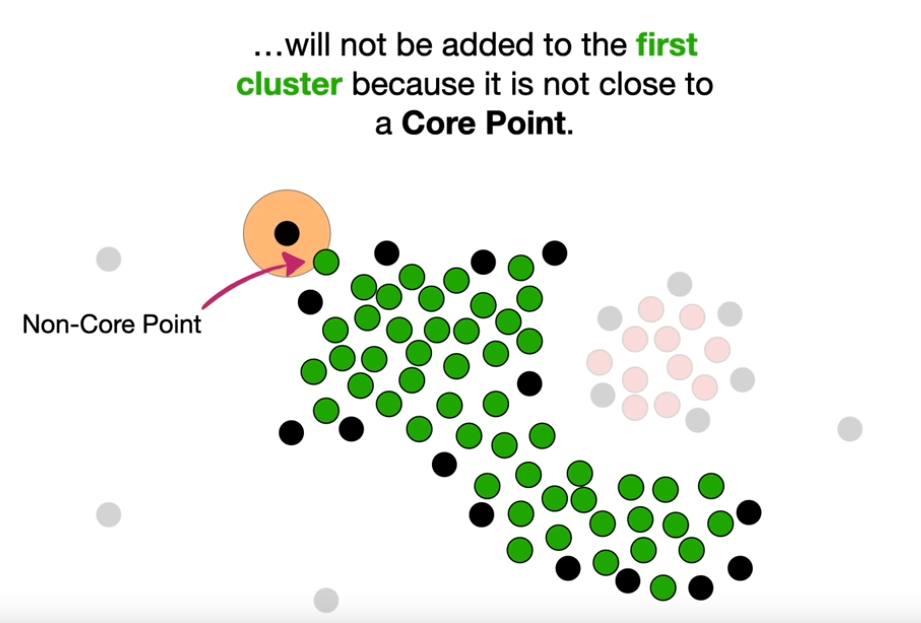

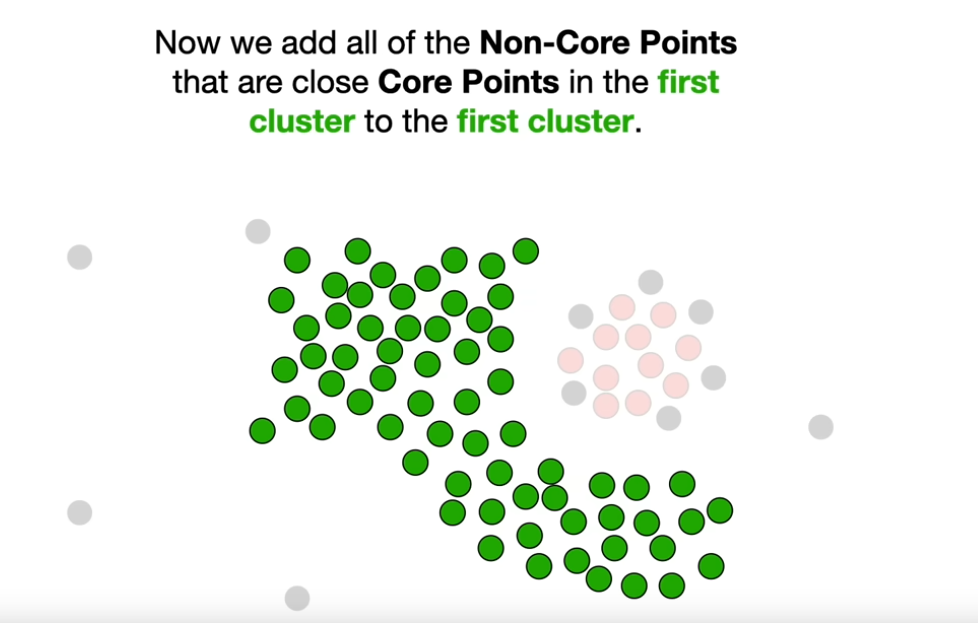

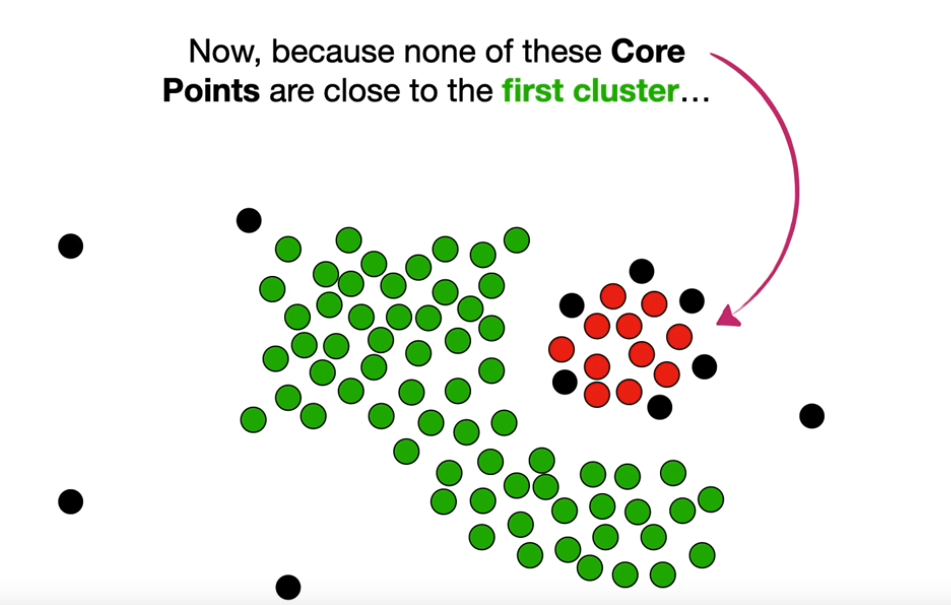



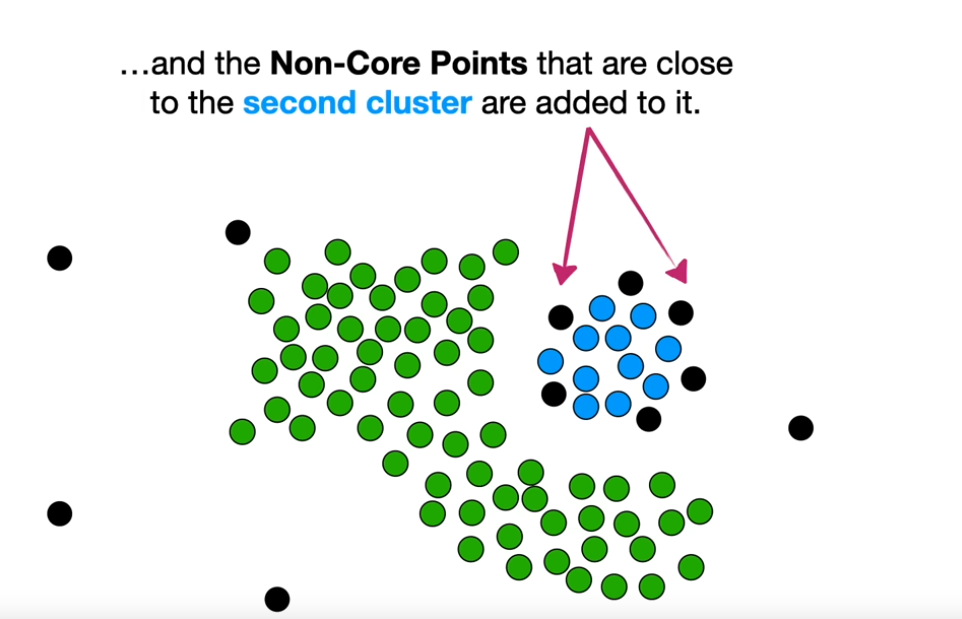

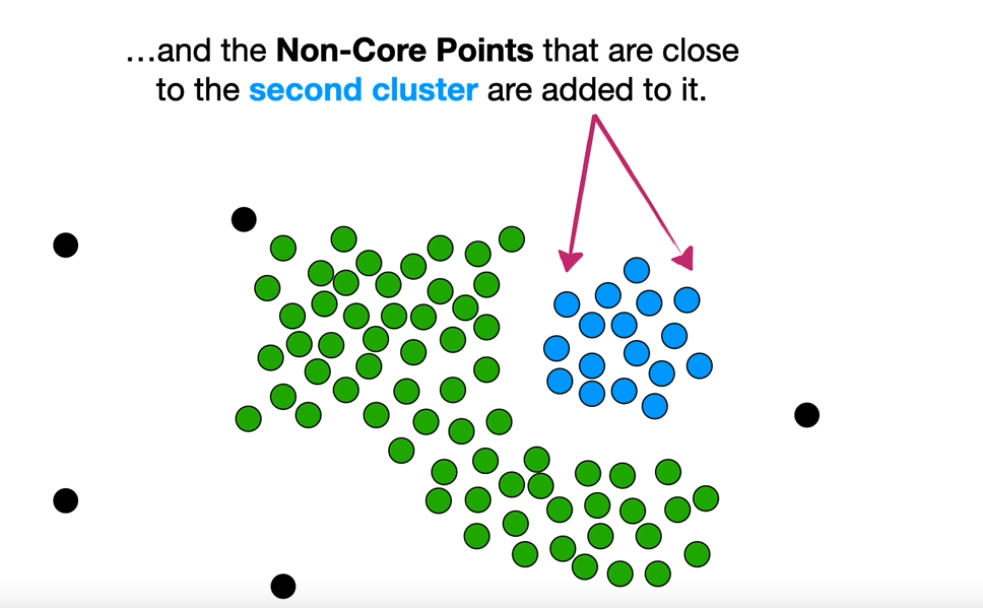



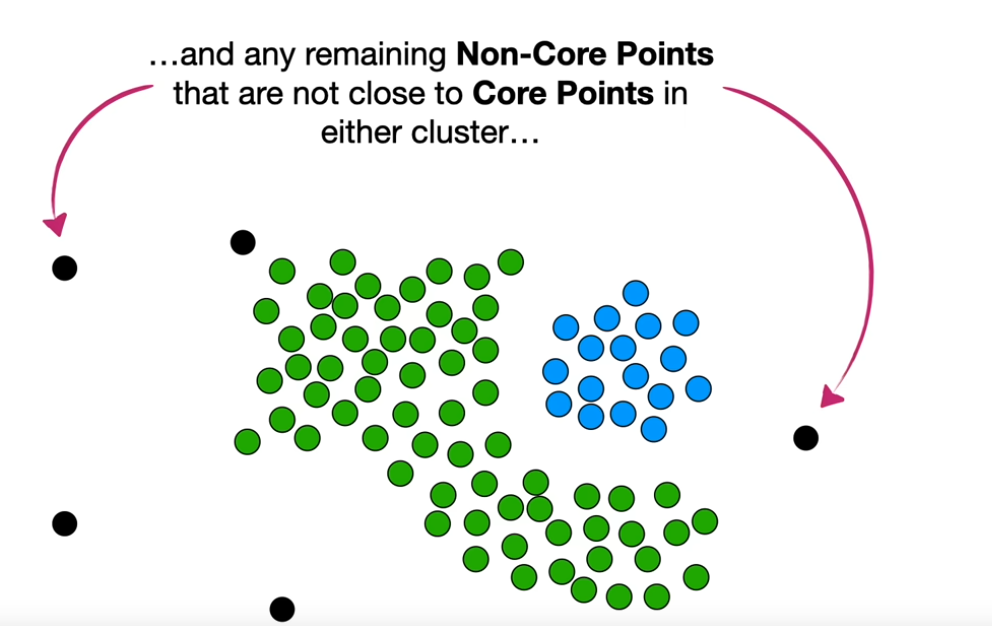

In [ ]:
# Fit DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
db_labels = db.fit_predict(Xm_scaled)


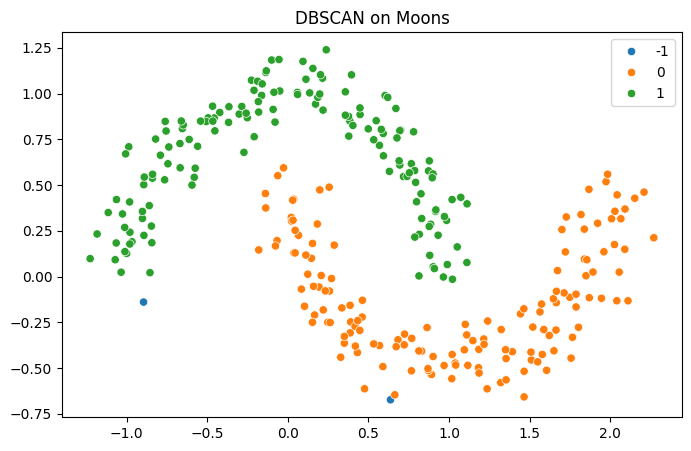

In [ ]:
# Visualize DBSCAN result
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_moon[:, 0], y=X_moon[:, 1], hue=db_labels, palette='tab10')
plt.title('DBSCAN on Moons')
plt.show()


In [ ]:

# ✅ Summary Table
from IPython.display import display, Markdown

display(Markdown("""
| Algorithm              | Needs K? | Handles Outliers? | Handles Non-Spherical? |
|------------------------|----------|--------------------|-------------------------|
| K-Means                | ✅ Yes   | ❌ No              | ❌ No                  |
| Hierarchical Clustering| ✅ Yes   | ❌ No              | ❌ No                  |
| DBSCAN                 | ❌ No    | ✅ Yes             | ✅ Yes                 |

- Use **Hierarchical** when you want interpretability and dendrograms
- Use **DBSCAN** when you want to detect noise or clusters of arbitrary shape
"""))


| Algorithm              | Needs K? | Handles Outliers? | Handles Non-Spherical? |
|------------------------|----------|--------------------|-------------------------|
| K-Means                | ✅ Yes   | ❌ No              | ❌ No                  |
| Hierarchical Clustering| ✅ Yes   | ❌ No              | ❌ No                  |
| DBSCAN                 | ❌ No    | ✅ Yes             | ✅ Yes                 |

- Use **Hierarchical** when you want interpretability and dendrograms
- Use **DBSCAN** when you want to detect noise or clusters of arbitrary shape


In [ ]:
Train error =70 Percent  High Bias ( Its Performing Bad in Training Data)

Train error = 1 percent  Low Bias ( Perfected Memorized Training Data)

test eror = 70   High Viarance (Perform very bad in Unseen Data )

Overfit -> Low Bias (Extremely Perfect Training Data ) + (High Variance -> Unseen Data )

Low Bias (Extremely Perfect Training Data ) + (Low Variance -> Unseen Data ) -> Perfect Model

High Bias ( Extremely Bad Model)

## Underfit overfit Bias Variance

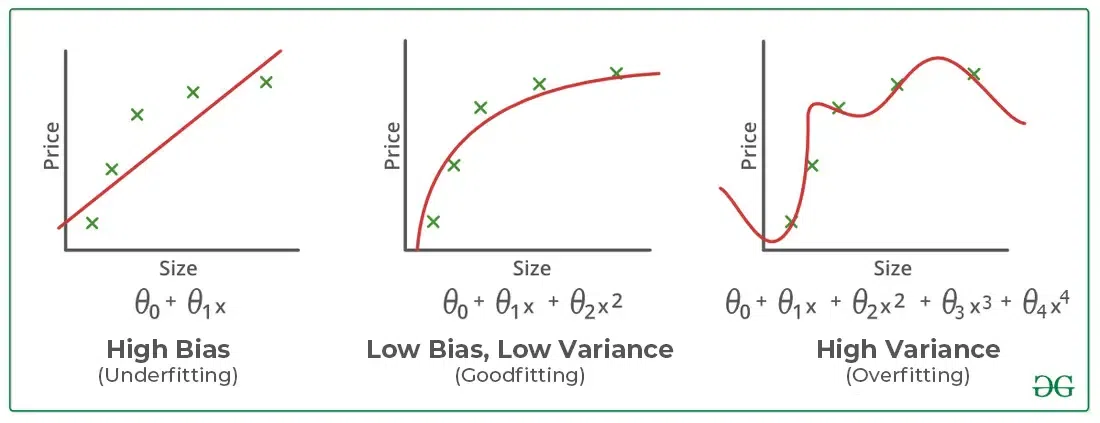

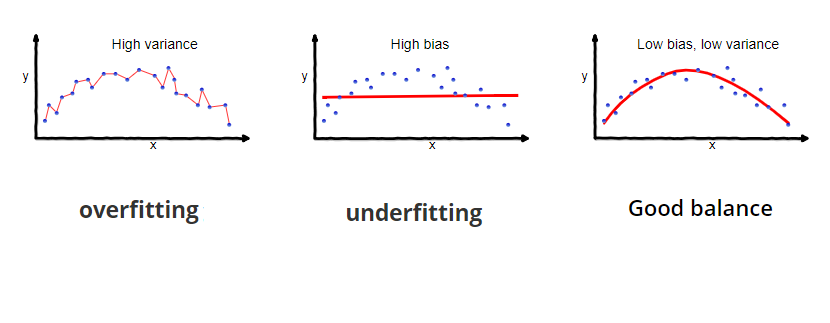

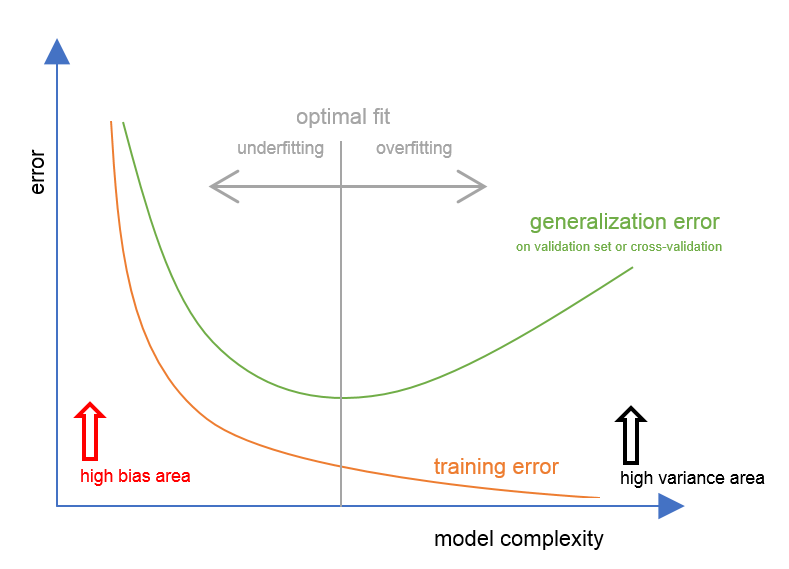

✅ UNDERFITTING

Definition: The model is too simple to capture the underlying patterns in the data — it performs poorly on both training and test data.
🔍 Symptoms:

    High training error

    High validation/test error

    Model doesn’t improve much with training

🔧 How to Fix:

    Use a more complex model

        Upgrade from linear to polynomial model

        Try deeper neural networks or more sophisticated algorithms

    Reduce regularization

        Lower the value of regularization parameters (e.g., decrease lambda in Ridge/Lasso or C in SVM)

    Train longer

        Increase number of training epochs (especially for neural networks)

    Feature engineering

        Add more relevant features

        Create interaction terms or nonlinear transformations

    Lower bias algorithms

        Switch from simple models (like linear regression) to more flexible ones (like random forests or gradient boosting)

✅ OVERFITTING

Definition: The model is too complex and learns the noise in the training data — performs well on training but poorly on test/validation data.
🔍 Symptoms:

    Low training error

    High validation/test error

    Performance drops on new/unseen data

🔧 How to Fix:

    Simplify the model

        Use fewer parameters, shallower trees, fewer layers

    Add regularization

        Increase regularization strength (e.g., L1/L2 penalty)

        Use dropout (in neural nets)

    More training data

        Overfitting often reduces with more examples

    Early stopping

        Stop training when validation loss starts increasing

    Data augmentation

        For image, audio, or text tasks, augment training data to improve generalization

    Cross-validation

        Use techniques like k-fold CV to tune hyperparameters robustly